In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
Customer_Acquisition = pd.read_csv(r"C:\Users\gagan\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Customer Acqusition.csv")
Spend = pd.read_csv(r"C:\Users\gagan\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\spend.csv")
Repayment = pd.read_csv(r"C:\Users\gagan\Downloads\Python Foundation Case Study 2 - Credit Card Case Study\Case Study 2 - Credit Card Case Study\Repayment.csv")
Repayment

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


In [5]:
#1. a. In case age is less than 18, replace it with mean of age values.

mean_age = Customer_Acquisition['Age'][Customer_Acquisition['Age'] >= 18].mean()

mean_age = int(mean_age)

Customer_Acquisition.loc[Customer_Acquisition['Age'] < 18, 'Age'] = mean_age
Customer_Acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [7]:
#b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#(customer’s limit provided in acquisition table is the per transaction limit on his card)

df = pd.merge(Spend, Customer_Acquisition, on='Customer')

df.loc[df['Amount'] > df['Limit'], 'Amount'] = df['Limit'] * 0.5

df


,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,25-Mar-06,BUS TICKET,50000.00,68,48,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,31-Mar-06,BUS TICKET,5000.00,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,23-Mar-06,BUS TICKET,5000.50,70,48,BOMBAY,Platimum,10001.0,C32,Self Employed


In [9]:
#c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

df_1 = pd.merge(Repayment, Customer_Acquisition, on='Customer')

df_1.loc[df['Amount'] > df['Limit'], 'Amount'] = df['Limit']

df_1


,SL No:,Customer,Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,NaN,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496.0,A67,9-May-05,55638.77,NaN,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497.0,A68,10-May-06,319836.49,NaN,68,48,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498.0,A69,11-Jul-06,247628.45,NaN,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499.0,A70,12-Aug-05,454016.51,NaN,70,48,BOMBAY,Platimum,10001.0,C32,Self Employed


In [11]:
#2. a. How many distinct customers exist?
distinct_customers = Customer_Acquisition['Customer'].nunique()
distinct_customers

100

In [13]:
# b. How many distinct categories exist?
distinct_categories = Spend['Type'].nunique()
distinct_categories

15

In [15]:
#c. What is the average monthly spend by customers?

Spend['Month'] = pd.to_datetime(Spend['Month'], format='%d-%b-%y')

Spend['MonthPeriod'] = Spend['Month'].dt.to_period('M').dt.to_timestamp()

monthly_avg_spend = Spend.groupby('MonthPeriod')['Amount'].mean()

print(monthly_avg_spend)




MonthPeriod
2004-01-01    251712.068664
2004-02-01    221215.270000
2004-03-01    232146.119286
2004-04-01    235272.037143
2004-05-01    217539.236429
2004-09-01    310923.383571
2004-11-01    270486.397857
2005-01-01    292741.372857
2005-02-01    229802.279821
2005-04-01    252181.326429
2005-05-01    245696.515429
2005-06-01    262688.112857
2005-07-01    229116.663571
2005-08-01    233734.634286
2005-09-01    188666.202143
2005-10-01    194568.640714
2005-11-01    286143.322857
2005-12-01    147503.060000
2006-01-01    282058.006429
2006-02-01    253858.260714
2006-03-01    247166.084654
2006-04-01    232468.967553
2006-05-01    236162.740357
2006-06-01    177252.386429
2006-07-01    287505.098929
2006-08-01    240699.717143
2006-09-01    158520.090714
2006-10-01    236136.335000
2006-11-01    182841.290000
2006-12-01    270470.980714
Name: Amount, dtype: float64


In [21]:
# d. What is the average monthly repayment by customers?

Repayment['Month'] = pd.to_datetime(Repayment['Month'], format='%d-%b-%y')

Repayment['MonthPeriod'] = Repayment['Month'].dt.to_period('M').dt.to_timestamp()

monthly_avg_repayment = Repayment.groupby('MonthPeriod')['Amount'].mean()

print(monthly_avg_repayment)


MonthPeriod
2004-01-01    243489.649786
2004-02-01    256702.630741
2004-03-01    252585.280667
2004-04-01    259141.679000
2004-05-01    226162.720800
2004-09-01    184487.848750
2004-11-01    209592.238000
2005-01-01    240548.098148
2005-02-01    238829.265123
2005-04-01    212688.631333
2005-05-01    263207.367857
2005-06-01    210199.818333
2005-07-01    239871.479167
2005-08-01    264430.921622
2005-09-01    247700.170000
2005-10-01    219849.956667
2005-11-01    256695.120000
2005-12-01    320379.335833
2006-01-01    293475.389167
2006-02-01    284489.565128
2006-03-01    240851.266814
2006-04-01    275472.251889
2006-05-01    256920.884943
2006-06-01    251990.453333
2006-07-01    257936.383243
2006-08-01    224143.992500
2006-09-01    262533.880833
2006-10-01    260765.480000
2006-11-01    199399.197407
2006-12-01    252736.569167
Name: Amount, dtype: float64


In [23]:
# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
#(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts

monthly_profit = monthly_avg_repayment - monthly_avg_spend

interest_rate = 2.9 / 100
monthly_interest = monthly_profit.apply(lambda x: x * interest_rate if x > 0 else 0)

print(monthly_interest)


MonthPeriod
2004-01-01       0.000000
2004-02-01    1029.133461
2004-03-01     592.735680
2004-04-01     692.219614
2004-05-01     250.081047
2004-09-01       0.000000
2004-11-01       0.000000
2005-01-01       0.000000
2005-02-01     261.782574
2005-04-01       0.000000
2005-05-01     507.814720
2005-06-01       0.000000
2005-07-01     311.889652
2005-08-01     890.192333
2005-09-01    1711.985068
2005-10-01     733.158163
2005-11-01       0.000000
2005-12-01    5013.411999
2006-01-01     331.104099
2006-02-01     888.307828
2006-03-01       0.000000
2006-04-01    1247.095246
2006-05-01     601.986193
2006-06-01    2167.403940
2006-07-01       0.000000
2006-08-01       0.000000
2006-09-01    3016.399913
2006-10-01     714.245205
2006-11-01     480.179315
2006-12-01       0.000000
Name: Amount, dtype: float64


In [25]:
#f. What are the top 5 product types?
Products_count=Customer_Acquisition['Product'].value_counts()
Products_count.head(5)

Product
Gold        38
Platimum    32
Silver      30
Name: count, dtype: int64

In [27]:
# g. Which city is having maximum spend?

merged_df = pd.merge(Customer_Acquisition, Spend, on='Customer')

# Calculate the total spend for each city
total_spend_by_city = merged_df.groupby('City')['Amount'].sum()

max_spend_city = total_spend_by_city.idxmax()
max_spend_amount = total_spend_by_city.max()

print(f"City with maximum spend: {max_spend_city}, Total Spend: {max_spend_amount}")


City with maximum spend: COCHIN, Total Spend: 73495349.26


In [29]:
#h. Which age group is spending more money?

merged_df = pd.merge(Customer_Acquisition, Spend, on='Customer')

total_spend_by_age_group=merge_df.groupby('Age')['Amount'].sum()

max_spend_age_group = total_spend_by_age_group.idxmax()
max_spend_amount_by_age_group = total_spend_by_age_group.max()

print(f"City with maximum spend: {max_spend_age_group}, Total Spend: {max_spend_amount_by_age_group}")


NameError: name 'merge_df' is not defined

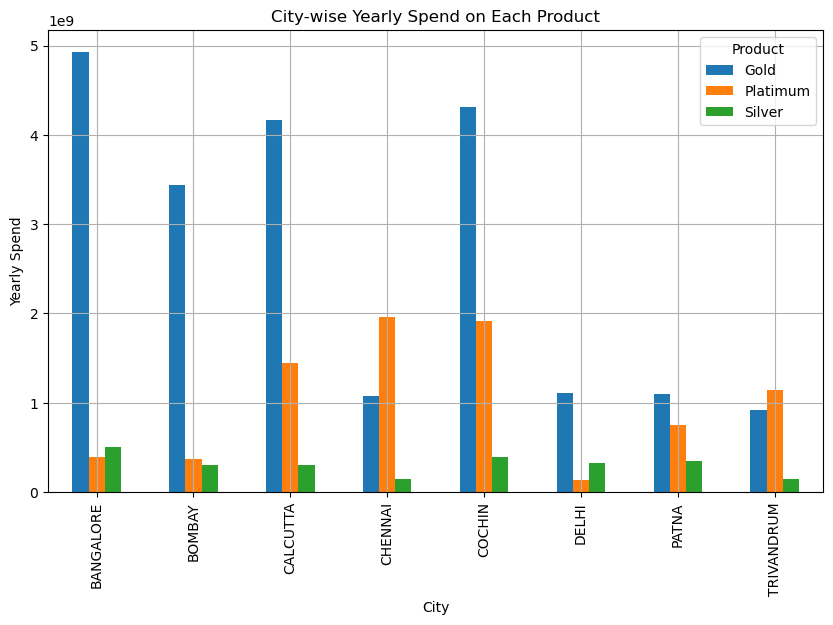

In [35]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 

df['Amount'] = df['Amount'] * 12

pivot_table = df.pivot_table(values='Amount', index='City', columns='Product', aggfunc='sum', fill_value=0)

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('City-wise Yearly Spend on Each Product')
plt.xlabel('City')
plt.ylabel('Yearly Spend')
plt.legend(title='Product')
plt.grid(True)
plt.show()


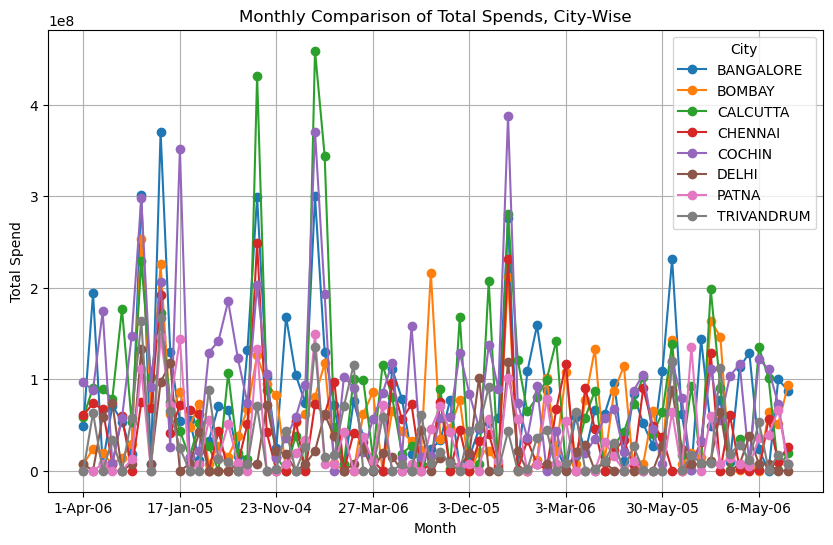

In [39]:
# 4. Create graphs for
# a. Monthly comparison of total spends, city wise

pivot_table = df.pivot_table(values='Amount', index='Month', columns='City', aggfunc='sum', fill_value=0)

pivot_table.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Comparison of Total Spends, City-Wise')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.legend(title='City')
plt.grid(True)
plt.show()


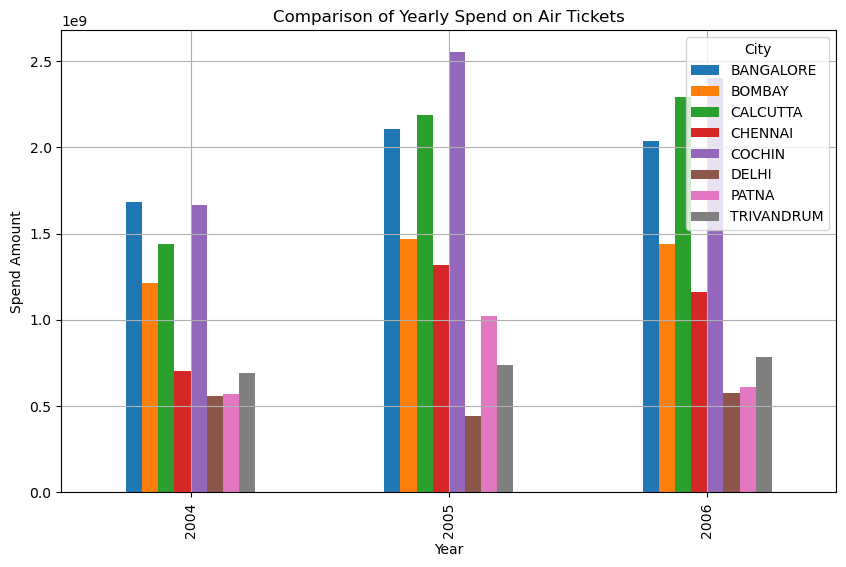

In [45]:
# b. Comparison of yearly spend on air tickets

df['Month'] = pd.to_datetime(df['Month'], format='%d-%b-%y')
df['Year'] = df['Month'].dt.year

pivot_table = df.pivot_table(values='Amount', index='Year', columns='City', aggfunc='sum', fill_value=0)

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Spend Amount')
plt.legend(title='City')
plt.grid(True)
plt.show()


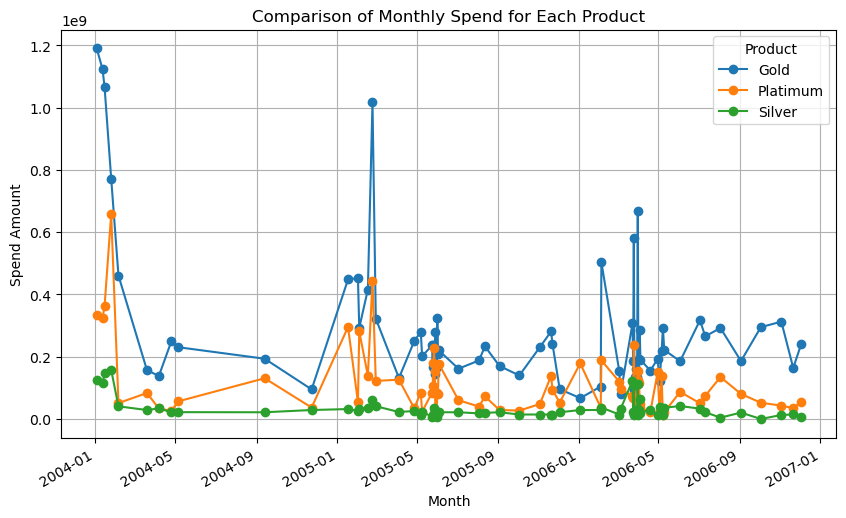

In [48]:
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

pivot_table = df.pivot_table(values='Amount', index='Month', columns='Product', aggfunc='sum', fill_value=0)

# Plotting the graph
pivot_table.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Comparison of Monthly Spend for Each Product')
plt.xlabel('Month')
plt.ylabel('Spend Amount')
plt.legend(title='Product')
plt.grid(True)
plt.show()


In [62]:
# 5. Write user defined PYTHON function to perform the following analysis:
#You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able 
#to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


merged_df = Customer_Acquisition.merge(Spend, on='Customer').merge(Repayment, on='Customer')

def top_customers(df, product, time_period):
    """
    Finds the top 10 customers for each city based on their repayment amount for a specified product and time period.
    
    Parameters:
    df (DataFrame): The merged dataset containing columns ['Customer', 'City', 'Product', 'Amount', 'Month'].
    product (str): The product type to filter by ('Gold', 'Silver', 'Platinum').
    time_period (str): The time period to group by ('yearly' or 'monthly').
    
    Returns:
    DataFrame: A DataFrame with the top 10 customers for each city.
    """
    
    # Filter the dataset based on the specified product
    df_filtered = df[df['Product'] == product]
    
    # Convert 'Month' column to datetime format
    df_filtered['Month'] = pd.to_datetime(df_filtered['Month'], format='%d-%b-%y')
    
    # Extract year if time_period is 'yearly'
    if time_period == 'yearly':
        df_filtered['Year'] = df_filtered['Month'].dt.year
        df_grouped = df_filtered.groupby(['Customer', 'City', 'Year'])['Amount'].sum().reset_index()
    elif time_period == 'monthly':
        df_grouped = df_filtered.groupby(['Customer', 'City', 'Month'])['Amount'].sum().reset_index()
    else:
        raise ValueError("Invalid time_period. Choose either 'yearly' or 'monthly'.")
    
    # Get the top 10 customers for each city
    top_customers = df_grouped.groupby('City').apply(lambda x: x.nlargest(10, 'Amount')).reset_index(drop=True)
    
    return top_customers

# Example usage
# Finding top customers for 'Gold' product on a yearly basis
top_customers_yearly = top_customers(merged_df, 'Gold', 'yearly')
print(top_customers_yearly)

# Finding top customers for 'Silver' product on a monthly basis
top_customers_monthly = top_customers(merged_df, 'Silver', 'monthly')
print(top_customers_monthly)


KeyError: 'Month'

In [50]:
Repayment.columns


Index(['SL No:', 'Customer', 'Month', 'Amount', 'Unnamed: 4', 'MonthPeriod'], dtype='object')

In [39]:
Customer_Acquisition.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment'],
      dtype='object')

In [45]:
Spend.columns

Index(['Sl No:', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')